In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [2]:
df1 = pd.read_excel(r"C:\Users\David gathara marigi\Downloads\solar_data_1.xlsx", engine='openpyxl')
df2 = pd.read_excel(r"C:\Users\David gathara marigi\Downloads\solar_data_2.xlsx", engine='openpyxl')
df = pd.concat([df1, df2], axis=0)
df.head()

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.75,3.25,5209.464685,1.243764e+04,0.0
1,Alabama,58997532,14749383.00,9.75,12069.322656,1.896138e+10,549.0
2,Alaska,2179124,544781.00,7.25,6540.612622,4.664927e+08,83.0
3,Arizona,114697808,28674452.00,11.75,18974.796637,4.639329e+10,39553.0
4,Arkansas,28130196,7032549.00,9.75,12099.947974,8.941609e+09,238.0


In [3]:
df.shape

(55, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 33
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state_name                  54 non-null     object 
 1   number_of_panels_total      55 non-null     int64  
 2   kw_total                    55 non-null     float64
 3   kw_median                   54 non-null     float64
 4   yearly_sunlight_kwh_median  54 non-null     float64
 5   yearly_sunlight_kwh_total   55 non-null     float64
 6   existing_installs_count     54 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.4+ KB


In [5]:
df.describe()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
count,5.500000e+01,5.500000e+01,54.000000,54.000000,5.500000e+01,54.000000
mean,6.418217e+07,1.604554e+07,7.907407,9952.438422,2.078188e+10,12785.666667
std,9.028737e+07,2.257184e+07,1.963882,3390.644848,3.233178e+10,46522.857045
min,3.100000e+01,7.750000e+00,3.250000,5156.452783,1.243764e+04,0.000000
25%,1.704436e+07,4.261089e+06,6.750000,7350.628174,5.982309e+09,357.000000
50%,4.847139e+07,1.211785e+07,7.750000,9409.792603,1.481478e+10,1727.000000
75%,7.325589e+07,1.831397e+07,9.000000,11375.480533,2.074348e+10,5994.500000
max,5.310227e+08,1.327557e+08,13.000000,19004.649878,1.980163e+11,328899.000000


In [6]:
df['state_name'].unique().shape

(52,)

In [7]:
df['state_name'].unique()

array([nan, 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

array([[<Axes: title={'center': 'number_of_panels_total'}>,
        <Axes: title={'center': 'kw_total'}>],
       [<Axes: title={'center': 'kw_median'}>,
        <Axes: title={'center': 'yearly_sunlight_kwh_median'}>],
       [<Axes: title={'center': 'yearly_sunlight_kwh_total'}>,
        <Axes: title={'center': 'existing_installs_count'}>]],
      dtype=object)

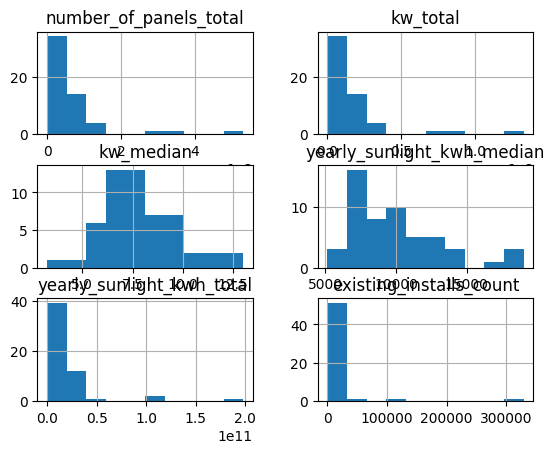

In [8]:
df.hist()

In [9]:
df.select_dtypes(include="number").corr()

,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
number_of_panels_total,1.000000,1.000000,0.300934,0.307517,0.995182,0.813889
kw_total,1.000000,1.000000,0.300934,0.307517,0.995182,0.813889
kw_median,0.300934,0.300934,1.000000,0.938811,0.326023,0.269857
yearly_sunlight_kwh_median,0.307517,0.307517,0.938811,1.000000,0.348925,0.326591
yearly_sunlight_kwh_total,0.995182,0.995182,0.326023,0.348925,1.000000,0.853207
existing_installs_count,0.813889,0.813889,0.269857,0.326591,0.853207,1.000000


<Axes: xlabel='yearly_sunlight_kwh_median', ylabel='existing_installs_count'>

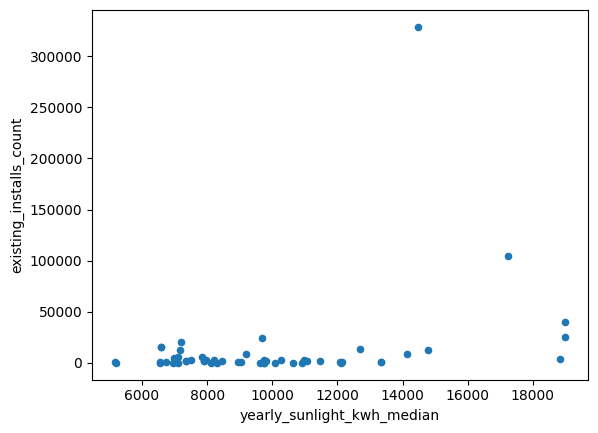

In [10]:
df.plot.scatter(x='yearly_sunlight_kwh_median', y='existing_installs_count')

In [11]:
df[df['existing_installs_count'] > 50000]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
5,California,531022657,1.327557e+08,9.75,14460.077979,1.980163e+11,328899.0
10,Florida,305682374,7.642059e+07,12.75,17250.183057,1.050627e+11,104123.0


In [12]:
df.sort_values(by='existing_installs_count')

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
0,NaN,31,7.750000e+00,3.25,5209.464685,1.243764e+04,0.0
21,South Dakota,5162611,1.290653e+06,7.75,9741.482898,1.610011e+09,21.0
14,North Dakota,7273416,1.818354e+06,9.75,10901.191687,2.069036e+09,24.0
30,Wyoming,3249883,8.124708e+05,7.75,10645.344800,1.108615e+09,29.0
28,West Virginia,6414155,1.603539e+06,7.00,8128.741748,1.857681e+09,80.0
2,Alaska,2179124,5.447810e+05,7.25,6540.612622,4.664927e+08,83.0
8,Delaware,1985389,4.963472e+05,8.00,9746.691431,6.068660e+08,90.0
25,Vermont,1517792,3.794480e+05,6.50,7115.722705,4.203384e+08,131.0
7,Nebraska,19400445,4.850111e+06,7.50,9624.277734,6.101929e+09,208.0
4,Arkansas,28130196,7.032549e+06,9.75,12099.947974,8.941609e+09,238.0


In [13]:
df.duplicated().sum()

3

In [14]:
df[df.duplicated(keep=False)]

,state_name,number_of_panels_total,kw_total,kw_median,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,existing_installs_count
1,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
2,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
3,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0
31,Massachusetts,52098838,13024709.50,5.75,6571.621021,1.486191e+10,15331.0
32,Michigan,96360897,24090224.25,6.75,7350.628174,2.695720e+10,1727.0
33,Minnesota,51738380,12934595.00,7.00,7896.430273,1.481478e+10,1519.0


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(52, 7)

In [17]:
imputer = KNNImputer(n_neighbors=2)
state_names = df[['state_name']]  
numeric_df = df.drop('state_name', axis=1)
imputed = imputer.fit_transform(numeric_df)
numeric_df[numeric_df.columns] = imputed
df = pd.concat([state_names, numeric_df], axis=1)

In [18]:
df.isna().sum()

state_name                    1
number_of_panels_total        0
kw_total                      0
kw_median                     0
yearly_sunlight_kwh_median    0
yearly_sunlight_kwh_total     0
existing_installs_count       0
dtype: int64

In [19]:
df.to_excel('cleaned_solar_data.xlsx', index=False)

Summary:

The data is very small, with each US state, DC, and one unknown location having data. Most of the data is left-skewed with some large outliers. A few large outliers are CA and FL, which have a lot of installed solar panels.
We also see some strong correlations between certain columns of data. For example, the yearly kW total, number of panels, and existing installs count were strongly correcated, the kWh and kW median columns were weakly correlated to everything else. Some duplicates were detected in the data and were removed, and some missing values filled in with KNN imputation. Then the data was saved to an Excel file for further use.